<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#CA6F1E;
            overflow:hidden;
            font-weight:700"><span style='color:#283747'></span>"Predicting Insurance Charges." </div>

Develop a model to predict the insurance charges (**charges**). This model can help the insurance company in setting premiums more accurately.

- [1. Load the dataset](#1)

- [2.Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Exploring the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Value](#1.3.1)
        - [2.3.2 Duplicated](#1.3.2)
        - [2.3.3 Outliter](#1.3.3)
     
    - [2.3 Diagnostics Analytics](#2.3)
- [3. Data preprocessing and feature engineering](#4)
  
    <!-- - [3.1 Min-Max Scaling or Standardization?](#4.1) -->
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)
       - [4.1.1 Feature selection](#5.2.1)
           - [4.1.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
- [5. Model Evaluation](#6) 


## import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # linearRegression.fit(x_train, y_train)

# from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## 1. Load the dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G6/main/Dataset/5.%20insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### The data are not outliers and are correctly typed

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 2.1 Duplicated

In [6]:
data.duplicated().sum()

1

In [7]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
data.drop_duplicates(inplace=True)

### 2.2 Outlier

<Axes: >

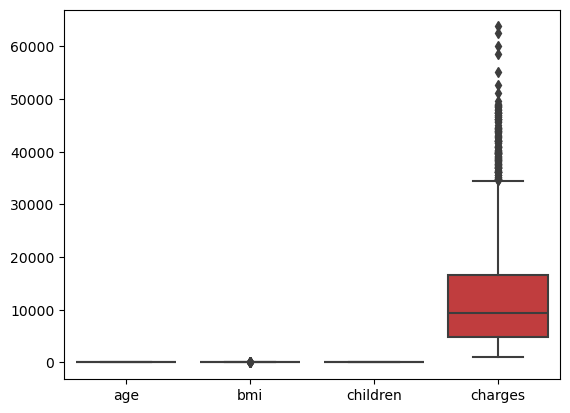

In [9]:
sns.boxplot(data = data)

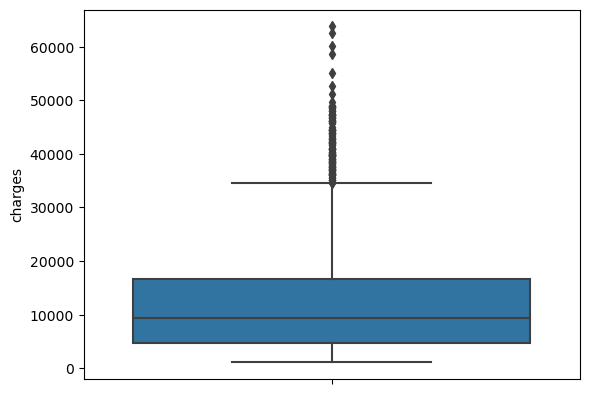

In [10]:
sns.boxplot(y = data['charges']);

we will train data with outlier 

In [11]:
# data[['age', 'charges']]

Text(0, 0.5, 'Frequency')

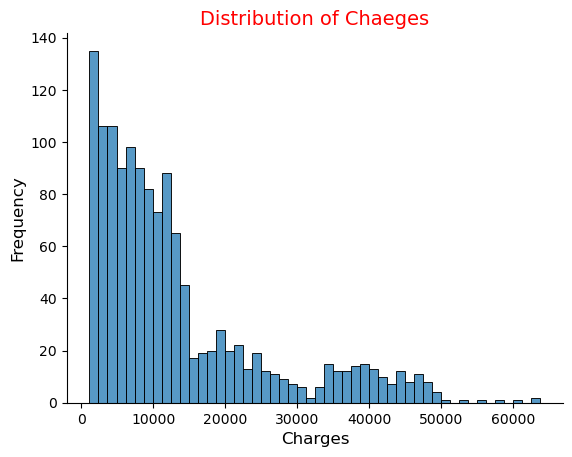

In [12]:
fig, ax = plt.subplots()
sns.histplot(x = data['charges'], bins = 50)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title('Distribution of Chaeges', fontsize = 14, color ='r')
ax.set_xlabel('Charges', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

### 2.3 Dianostics Analysis

In [13]:
cat_columns = []
num_columns = []
for i in data.columns:
    if data[i].nunique()>10:
        num_columns.append(i)
    else:
        cat_columns.append(i)
        

In [14]:
cat_columns

['sex', 'children', 'smoker', 'region']

In [15]:
num_columns

['age', 'bmi', 'charges']

#### 2.3.1 Exploring Categorical Data with Target

In [19]:
data.groupby(['sex', 'smoker'])['charges'].describe()

count          mean           std         min           25%  \
sex    smoker                                                                
female no      547.0   8762.297300   6060.775970   1607.5101   4265.599100   
       yes     115.0  30678.996276  11907.536381  13844.5060  19696.432100   
male   no      516.0   8099.700161   5907.000174   1121.8739   3684.907500   
       yes     159.0  33042.005975  11202.670862  12829.4551  21241.526875   

                        50%          75%          max  
sex    smoker                                          
female no       7639.417450  11786.16660  36910.60803  
       yes     28950.469200  40918.31450  63770.42801  
male   no       6986.101975  10960.85900  32108.66282  
       yes     36085.219000  41797.58905  62592.87309

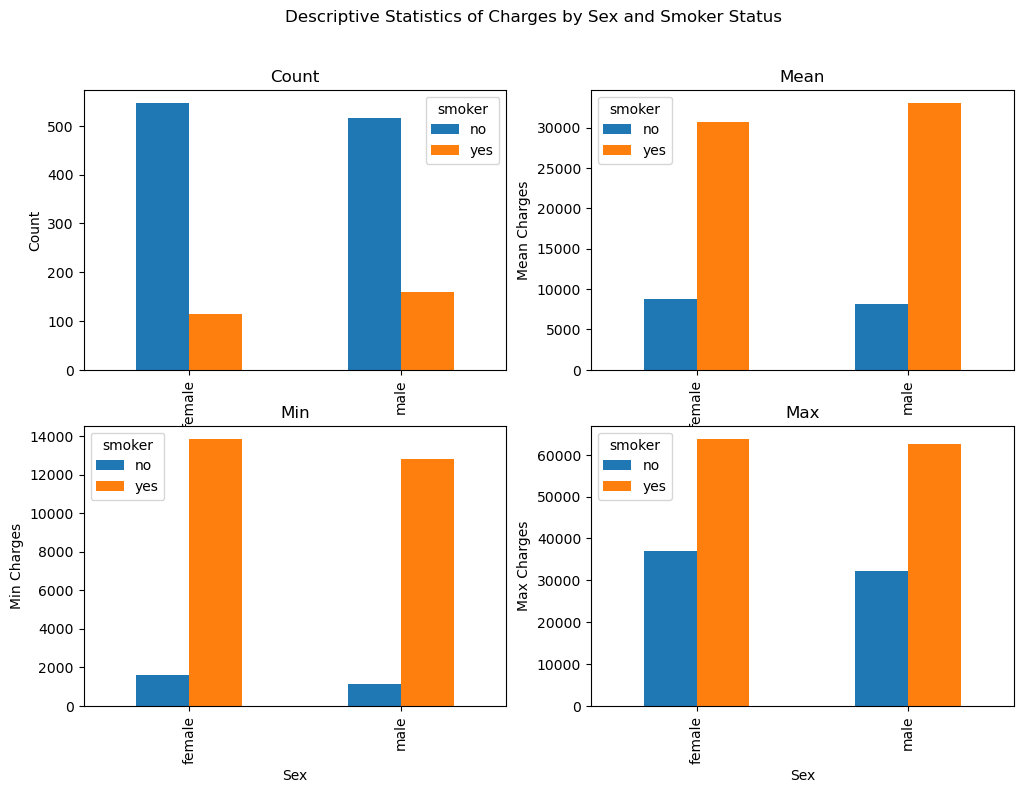

In [20]:
grouped_data = data.groupby(['sex', 'smoker'])['charges'].describe()[['count', 'mean', 'min', 'max']]

# Define the statistics to plot
stats = ['count', 'mean', 'min', 'max']
titles = ['Count', 'Mean', 'Min', 'Max']
y_labels = ['Count', 'Mean Charges', 'Min Charges', 'Max Charges']

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Descriptive Statistics of Charges by Sex and Smoker Status')

# Loop through the statistics and create subplots
for i, stat in enumerate(stats):
    row, col = divmod(i, 2)
    grouped_data[stat].unstack().plot(kind='bar', ax=axes[row, col], title=titles[i])
    axes[row, col].set_xlabel('Sex')
    axes[row, col].set_ylabel(y_labels[i])

plt.tight_layout(rect=[0, 0, 1, 0.2])
plt.show()

#### 2.3.2 Exploring Numerical Data with Target

In [ ]:
# sns.pairplot(data = data[num_columns], hue = data['smoker'])

#### age with Target

In [ ]:
data.columns

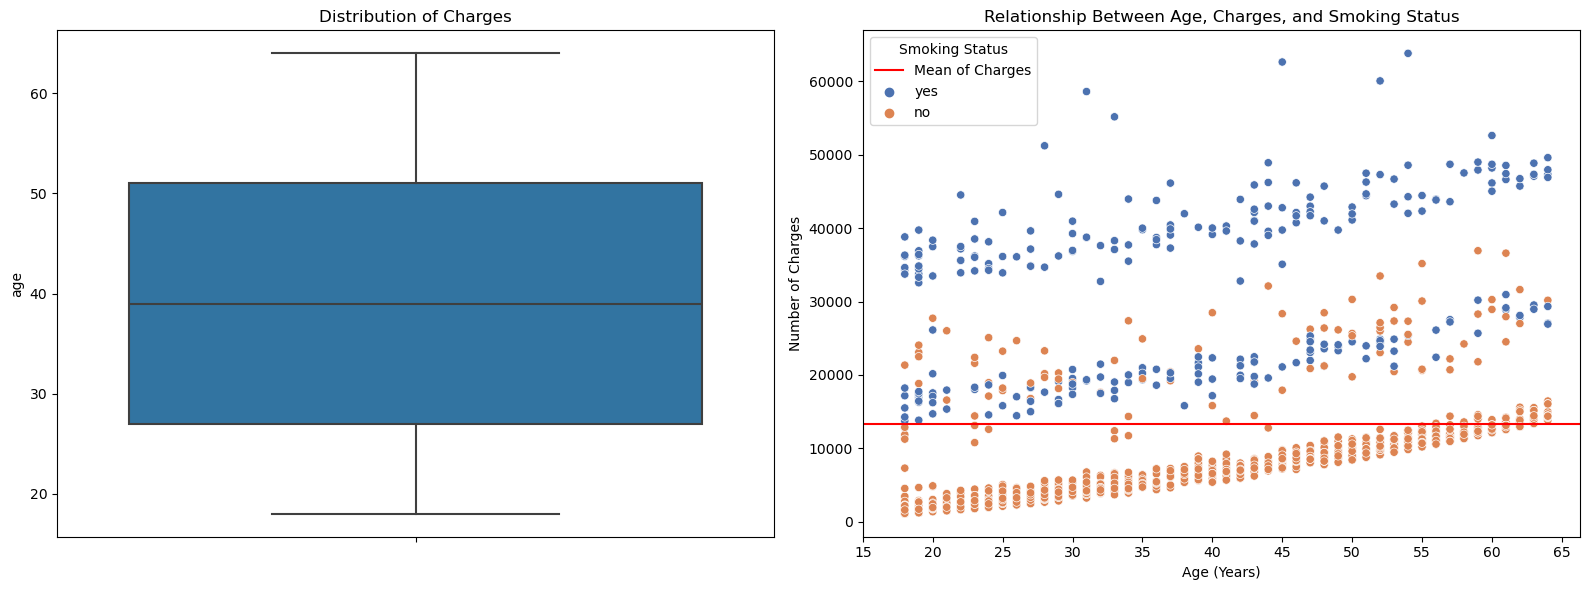

In [23]:
fig, ax =plt.subplots(1, 2 , figsize = (16, 6), )
sns.boxplot(y = data['age'], ax =ax[0])
ax[0].set_title('Distribution of Charges')
ax[1].axhline(y = data['charges'].mean(), label = 'Mean of Charges', color = 'r')
ax[1].legend()
sns.scatterplot(x = data['age'], y = data['charges'], hue = data['smoker'], palette="deep", ax = ax[1])
ax[1].set_xticks(np.arange(15, 66, 5))
ax[1].set_xlabel("Age (Years)")
ax[1].set_ylabel("Number of Charges")
ax[1].set_title("Relationship Between Age, Charges, and Smoking Status")
ax[1].legend(title="Smoking Status")
plt.tight_layout()
# plt.savefig('D&Re and Charges.jpg', dpi = 1000)
plt.show()

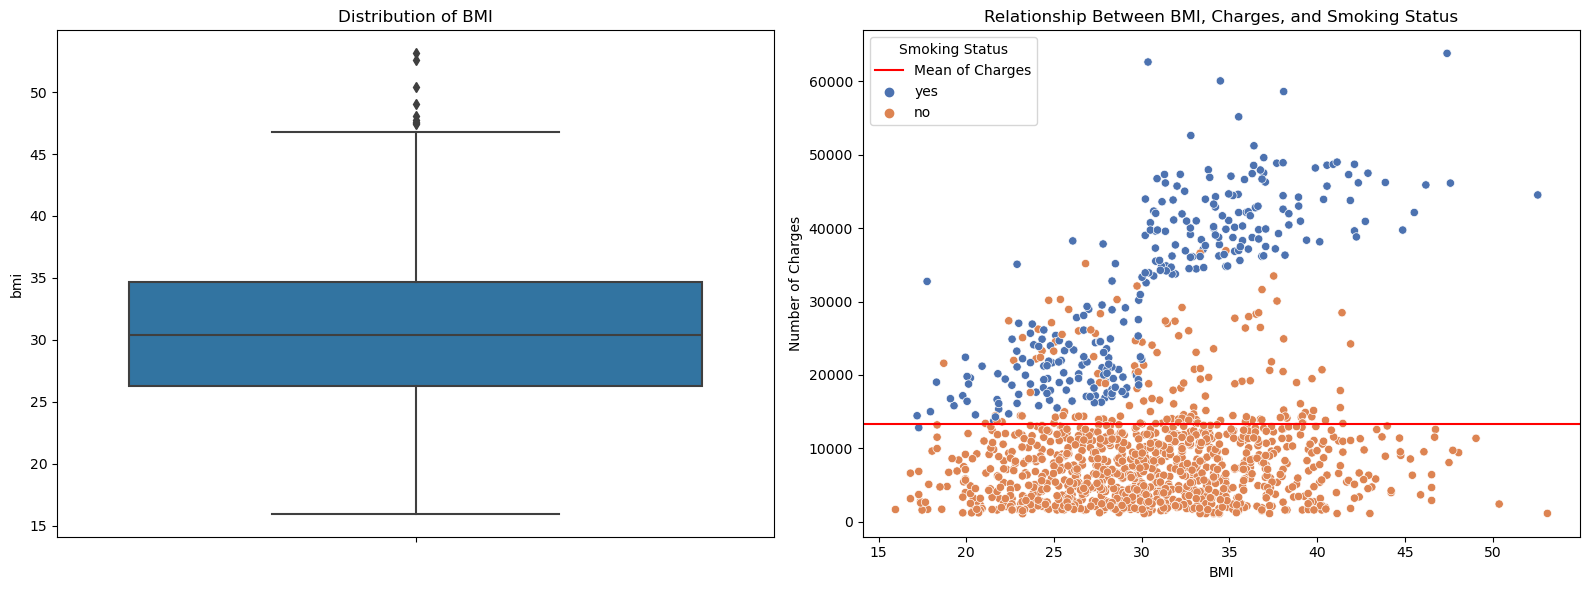

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(y=data['bmi'], ax=ax[0])
ax[0].set_title('Distribution of BMI')

# Combined plot for 'charges' vs 'bmi' and 'smoker'
ax[1].axhline(y=data['charges'].mean(), label='Mean of Charges', color='r')
ax[1].legend()
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'], palette="deep", ax=ax[1])
ax[1].set_xlabel("BMI")  # Update label for 'bmi'
ax[1].set_ylabel("Number of Charges")
ax[1].set_title("Relationship Between BMI, Charges, and Smoking Status")
ax[1].legend(title="Smoking Status")

# Adjust layout
plt.tight_layout(rect=(0, 0, 1, 1))
# plt.savefig('bmi.jpg', dpi = 1000)
plt.show()

In [28]:
data.groupby(['children', 'smoker'])['charges'].describe()

count          mean           std          min           25%  \
children smoker                                                                 
0        no      458.0   7624.833139   5858.263426   1121.87390   2271.751600   
         yes     115.0  31341.363954  11596.678789  13747.87235  20057.034600   
1        no      263.0   8303.109350   5987.135990   1711.02680   4447.807900   
         yes      61.0  31822.654334  11813.013604  15359.10450  20773.627750   
2        no      185.0   9493.093674   6456.112895   2304.00220   5124.188700   
         yes      55.0  33844.235755  11311.748471  12829.45510  22179.710000   
3        no      118.0   9614.519391   5159.770864   3443.06400   6117.122650   
         yes      39.0  32724.915268  11412.853656  16420.49455  22883.421325   
4        no       22.0  12121.344408   7466.220703   4504.66240   7310.926950   
         yes       3.0  26532.276933  11952.285332  17942.10600  19707.292400   
5        no       17.0   8183.845556   2911.244983   4687.79700   5615.369000   
         yes       1.0  19023.260000           NaN  19023.26000  19023.260000   

                          50%           75%          max  
children smoker                                           
0        no       6185.723900  11836.315575  30259.99556  
         yes     33900.653000  39202.221650  63770.42801  
1        no       7050.642000   9878.837850  35160.13457  
         yes     34806.467700  41034.221400  58571.07448  
2        no       7726.854000  11187.656700  36910.60803  
         yes     38344.566000  43855.121200  49577.66240  
3        no       8530.145725  11925.807650  30063.58055  
         yes     32787.458590  41445.264750  60021.39897  
4        no      10996.190500  14033.087462  36580.28216  
         yes     21472.478800  30827.362400  40182.24600  
5        no       8582.302300   9788.865900  14478.33015  
         yes     19023.260000  19023.260000  19023.26000

In [29]:
data.groupby(['region','smoker'])['charges'].describe()

count          mean           std         min           25%  \
region    smoker                                                                
northeast no      257.0   9165.531672   6157.196439   1694.7964   4438.263400   
          yes      67.0  29673.536473  11589.559770  12829.4551  19881.400425   
northwest no      266.0   8582.467101   6125.331366   1621.3402   4201.807987   
          yes      58.0  30192.003182  11413.827702  14711.7438  20834.130337   
southeast no      273.0   8032.216309   6137.329758   1121.8739   3471.409600   
          yes      91.0  34844.996824  11324.766536  16577.7795  23155.105450   
southwest no      267.0   8019.284513   5489.514421   1241.5650   3947.026500   
          yes      58.0  32269.063494  11270.279593  13844.5060  20396.042022   

                           50%           75%          max  
region    smoker                                           
northeast no       8342.908750  11938.255950  32108.66282  
          yes     28101.333050  39576.950850  58571.07448  
northwest no       7259.232050  11355.802575  33471.97189  
          yes     27488.996475  39918.948975  60021.39897  
southeast no       6652.528800  10982.501300  36580.28216  
          yes     37484.449300  43391.859400  63770.42801  
southwest no       7348.142000  11017.990500  36910.60803  
          yes     35165.256500  39809.292750  52590.82939

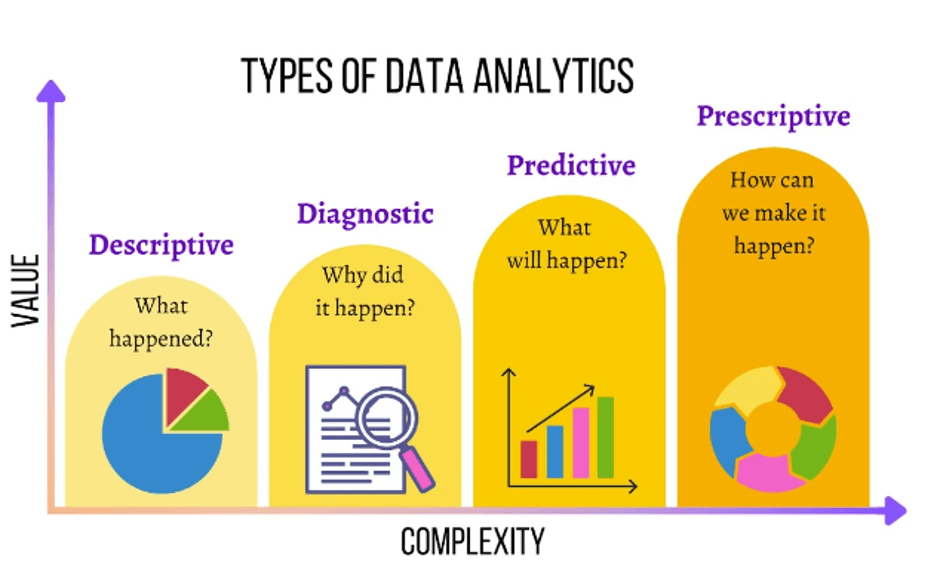!

### correlation coefficient

In [32]:
data[['age', 'children', 'bmi','charges']].corr()['charges']

age         0.298308
children    0.067389
bmi         0.198401
charges     1.000000
Name: charges, dtype: float64

## 3. Data preprocessing

## change value as string to numeric

In [33]:
df = data.copy()

In [38]:
df.drop(columns='region', inplace=True)

In [39]:
df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [40]:
df['sex'].replace({'female':1,
                  'male':0}, inplace=True)

In [41]:
df['smoker'].replace({'no':0,
                     'yes':1}, inplace=True)

In [ ]:
# df['region'].value_counts()

In [42]:
# df = pd.get_dummies(data = df, prefix= 'region')

In [ ]:
# #Label Encoding for (categorical variables)
# data['sex_l'] = LabelEncoder().fit_transform(data['sex'])
# data['smoker_l'] = LabelEncoder().fit_transform(data['smoker'])
# # data['region_l'] = LabelEncoder().fit_transform(data['region'])
# data

In [43]:
# df.replace({False:0, True:1}, inplace=True)

In [45]:
df

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [ ]:
# sns.pairplot(data = df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']])  

In [46]:
df.corr()[['charges']]

,charges
age,0.298308
sex,-0.058044
bmi,0.198401
children,0.067389
smoker,0.787234
charges,1.000000


## 4. Model building


In [47]:
from sklearn.model_selection import train_test_split

In [89]:
df.drop(columns='sex', inplace=True)

In [104]:
df.drop(columns='children', inplace=True)

In [105]:
x = df.drop(columns='charges')
y = df['charges']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=90) # 0.3 =30% for testing

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
Linear_model = LinearRegression()

In [109]:
Linear_model.fit(x_train, y_train)

LinearRegression()

In [110]:
Linear_model.score(x_train, y_train)

0.7395487605562812

In [111]:
Linear_model.score(x_test, y_test)

0.7603911111037744

In [112]:
Linear_model.intercept_

-10908.54739661371

In [113]:
Linear_model.coef_

array([  259.99791578,   296.90107342, 23634.35178083])

In [114]:
err = y_test -Linear_model.predict(x_test)

In [115]:
err.describe()

count      402.000000
mean       141.160465
std       6219.114530
min     -11515.108355
25%      -2915.178853
50%      -1059.202826
75%       1666.518543
max      26474.888315
Name: charges, dtype: float64

In [126]:
Linear_model.intercept_

-10908.54739661371

In [128]:
x_train.columns

Index(['age', 'bmi', 'smoker'], dtype='object')

In [127]:
Linear_model.coef_

array([  259.99791578,   296.90107342, 23634.35178083])

In [129]:
20*259

5180

In [116]:
import statsmodels.api as sm

x_train_con = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train_con).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     881.2
Date:                Thu, 23 May 2024   Prob (F-statistic):          2.20e-271
Time:                        20:11:51   Log-Likelihood:                -9466.0
No. Observations:                 935   AIC:                         1.894e+04
Df Residuals:                     931   BIC:                         1.896e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.091e+04   1122.297     -9.720      0.000   -1.31e+04   -8706.022
age          259.9979     14.237     18.262      0.000     232.057     287.939
bmi          296.9011     33.543      8.851      0.000     231.073     362.730
smoker      2.363e+04    503.692     46.922      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      241.318   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.409
Skew:                           1.338   Prob(JB):                    5.18e-135
Kurtosis:                       5.951   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
explainer = RegressionExplainer(Linear_model, x_train, y_train)
ExplainerDashboard(explainer).run(port =2000)

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.5.50.191:2000


In [119]:
y_pre = Linear_model.predict(x_test)

In [121]:
error = y_test-y_pre
error.describe()

count      402.000000
mean       141.160465
std       6219.114530
min     -11515.108355
25%      -2915.178853
50%      -1059.202826
75%       1666.518543
max      26474.888315
Name: charges, dtype: float64

In [117]:
 # !pip install explainerdashboard?

In [55]:
from explainerdashboard import RegressionExplainer , ExplainerDashboard

In [ ]:


explainer = RegressionExplainer(Linear_model2, x2_train, y2_train)
ExplainerDashboard(explainer).run()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [ ]:
VIF(X_test)

In [122]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [123]:
explainer = RegressionExplainer(regr, x_train, y_train)
ExplainerDashboard(explainer).run(port=4000)

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explaine